In [6]:
import pandas as pd
import numpy as np 
import matplotlib
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')
matplotlib.rc('axes',unicode_minus = False)
matplotlib.rc('font',family = 'Malgun Gothic')

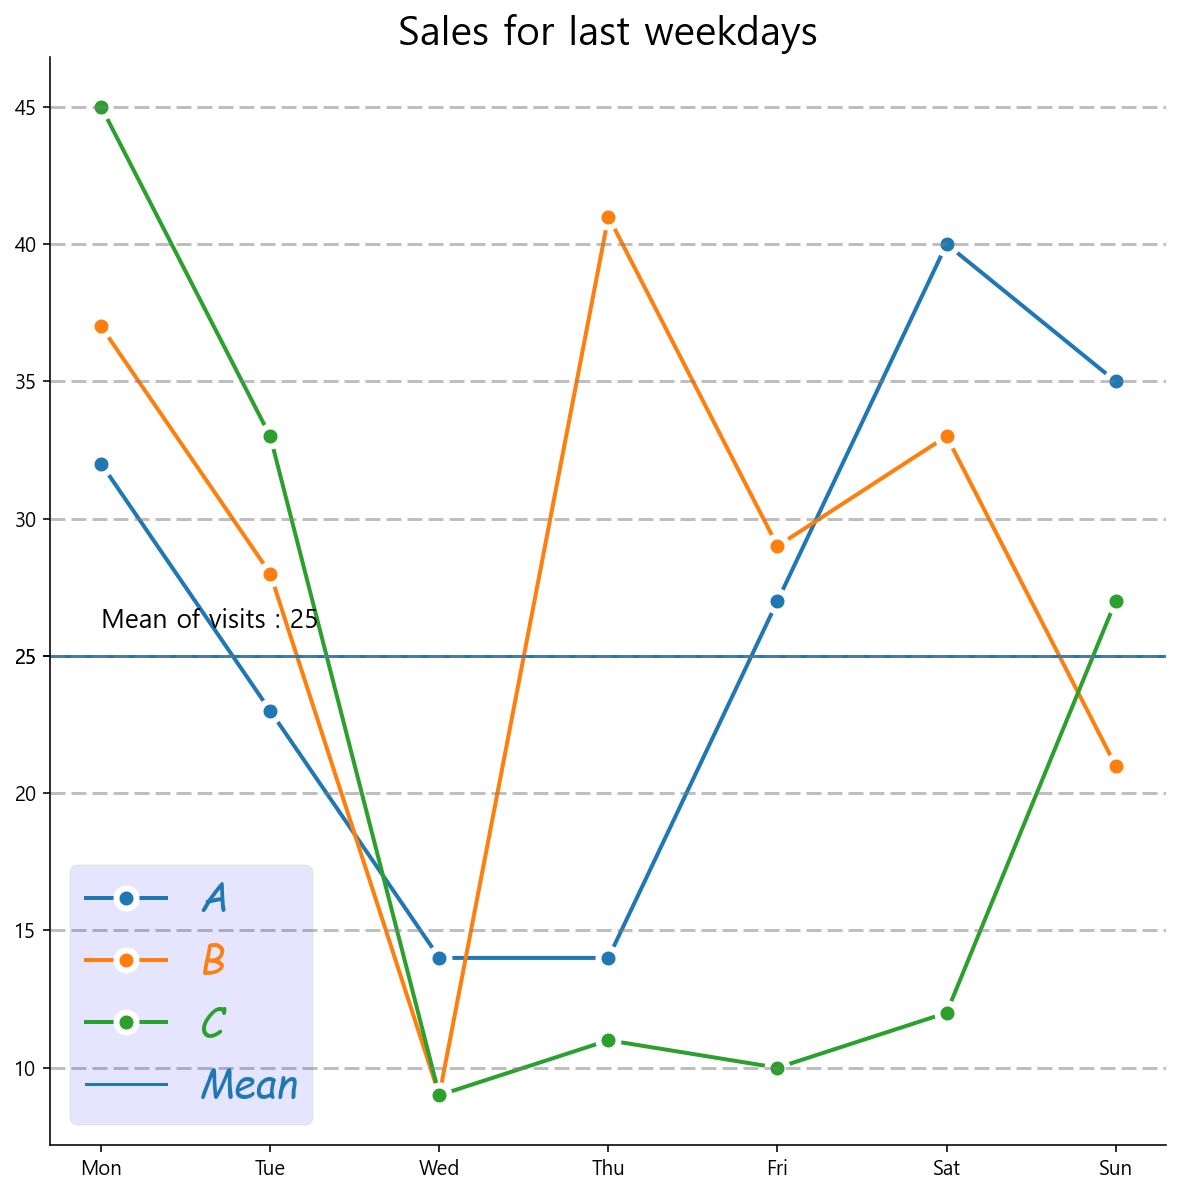

In [7]:
# 출처 : https://zephyrus1111.tistory.com/

df = pd.DataFrame()
df['days'] = ['Mon','Tue','Wed','Thu','Fri','Sat','Sun']*3 ## 요일
df['visits'] = [32,23,14,14,27,40,35,37,28,9,41,29,33,21,45,33,9,11,10,12,27] ## 방문 고객수
df['corp'] = ['A']*7 + ['B']*7 + ['C']*7 ## 회사명

mean_visits = int(np.mean(df['visits']))

a_df = df.query('corp =="A"') 
a_visits = a_df['visits']
days = a_df['days']
 
b_df = df.query('corp =="B"')
b_visits = b_df['visits']
 
c_df = df.query('corp =="C"')
c_visits = c_df['visits']

# 3등분
 
fig = plt.figure(figsize=(10,10)) ## 캔버스 생성
fig.set_facecolor('white') ## 캔버스 색상 설정
ax = fig.add_subplot() ## 그림 뼈대(프레임) 생성

ax.spines['right'].set_visible(False) ## 오른쪽 축 숨김
ax.spines['top'].set_visible(False) ## 위쪽 축 숨김
 
ax.plot(days,a_visits,marker='o', markeredgecolor='white',markeredgewidth=3, markersize=10,
        label='A', linestyle='solid',linewidth=2) ## 선그래프 생성
ax.plot(days,b_visits,marker='o',markeredgecolor='white',markeredgewidth=3, markersize=10,
        label='B', linestyle='solid',linewidth=2) 
ax.plot(days,c_visits,marker='o', markeredgecolor='white',markeredgewidth=3, markersize=10,
        label='C', linestyle='solid',linewidth=2) 

ax.axhline(mean_visits,label='Mean') ## 평균값을 y좌표로 하는 수평선 생성
ax.text(0,mean_visits+1,f'Mean of visits : {mean_visits}',fontsize=13) ## 평균 매출 텍스트 출력
 
ylim = ax.get_ylim() ## 기존의 y축 범위를 저장
 
yticks = list(ax.get_yticks()) ## y축 눈금을 가져온다.
 
for y in yticks:
    ax.axhline(y,linestyle=(0,(5,2)),color='grey',alpha=0.5) ## 눈금선 생성

# 평균값을 y 눈금에 추가한다.
yticks.append(mean_visits)
yticks = sorted(yticks)
 
ax.set_yticks(yticks) ## 평균이 포함된 y눈금으로 새롭게 세팅한다.
ax.set_ylim(ylim) ## 기존의 y축 범위를 유지

prop = dict(
    family='fantasy', # 글씨체
    style='italic', # 글씨 형식 - 이탤릭형식
    size=20 # 글씨 크기
)

leg = ax.legend(prop=prop,loc = 'lower left',facecolor='blue',framealpha=0.1,edgecolor='y') ## 범례
 
handles, _ = ax.get_legend_handles_labels() ## 그래프 요소와 해당 라벨을 가져옵니다.
 
for i, le in enumerate(leg.get_texts()): ## 범례 텍스트 클래스를 하나씩 돌면서 색을 설정한다.
    le.set_color(handles[i].get_color()) ## 선 그래프의 색상을 가져온다.

plt.title('Sales for last weekdays',fontsize=20) ## 타이틀 설정
plt.show()